# Scipy (continuación)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Interpolación

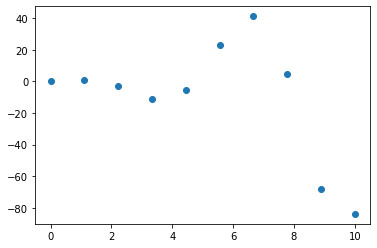

In [6]:
# Asumiendo que esta es data experimentaL
x=np.linspace(0,10,10)
y=x**2*np.cos(x)
plt.scatter(x,y)

In [5]:
from scipy import interpolate

In [7]:
f=interpolate.interp1d(x,y, kind='linear')
x_int=np.linspace(0,10,100)
y_int=f(x_int)

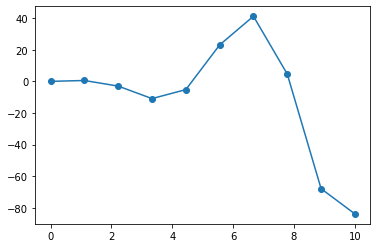

In [14]:
plt.plot(x_int,y_int)
plt.scatter(x,y)

In [15]:
f=interpolate.interp1d(x,y, kind='cubic')
x_int=np.linspace(0,10,100)
y_int=f(x_int)

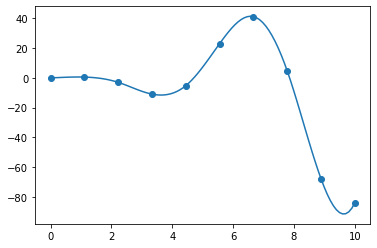

In [16]:
plt.plot(x_int,y_int)
plt.scatter(x,y)

In [17]:
interpolate.BSpline() #Revisar que hace este tipo de algoritmo en la interpolación

TypeError: __init__() missing 3 required positional arguments: 't', 'c', and 'k'

## Ajuste de curvas

In [19]:
x=np.linspace(0,10,10)
y=5*x+3

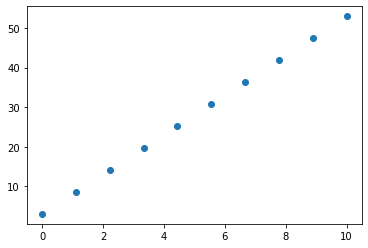

In [20]:
plt.scatter(x,y)

In [21]:
from scipy import optimize

In [42]:
def función(x,m,b):
    return m*x+b

In [43]:
optimize.curve_fit(función,x,y,p0=(1,1))

(array([5., 3.]),
 array([[ 1.00929356e-31, -5.04646779e-31],
        [-5.04646779e-31,  3.55121835e-30]]))

In [44]:
popt, pcov= optimize.curve_fit(función,x,y,p0=(1,1))

In [45]:
popt

array([5., 3.])

In [53]:
m_óptima, b_óptima=popt

In [54]:
b_óptima

2.999999999999996

In [48]:
pcov

array([[ 1.00929356e-31, -5.04646779e-31],
       [-5.04646779e-31,  3.55121835e-30]])

De la matriz de covarianza se toman los elementos de la diagonal para encontrar la desviación estandar de los parámetros

In [49]:
np.diag(pcov)

array([1.00929356e-31, 3.55121835e-30])

In [50]:
# La raíz cuadrada de la diagonal de la matriz de covarianza nos da la std de los parámetros
np.sqrt(np.diag(pcov)) # si ponemos el _ toma el resultado de la celda anterior

array([3.17693808e-16, 1.88446766e-15])

In [55]:
x_aju=np.linspace(0,10,100)
y_aju=función(x_aju, m_óptima, b_óptima)

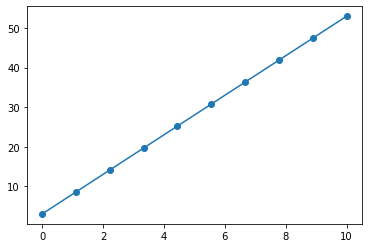

In [57]:
plt.scatter(x,y)
plt.plot(x_aju,y_aju)

Data experimental del movimiento de un sistema masa-resorte

In [58]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

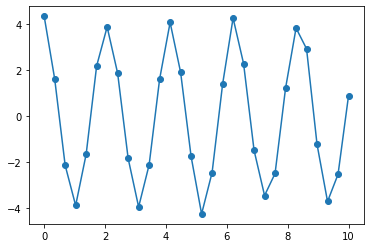

In [61]:
plt.plot(t_data, y_data, 'o-')

Se va a ajustar con la función:
$y(t)=A\cos(\omega t + \phi)$

$$\omega=2\pi f$$
$$f=1/T$$
$$f=1/2$$
$$\omega=\pi $$
$$\phi=0$$

In [62]:
def resorte(t, A, w, phi):
    return A*np.cos(w*t+phi)

In [77]:
popt, pcov= optimize.curve_fit(resorte, t_data, y_data, p0=(4,np.pi,0))

In [78]:
A_opt, w_opt, phi_opt=popt

In [79]:
A_opt, w_opt, phi_opt

(3.9483621862620235, 2.998995205451252, 0.10411351573281058)

In [80]:
t_aju=np.linspace(0,10,100)
y_aju=resorte(t_aju, A_opt, w_opt, phi_opt )

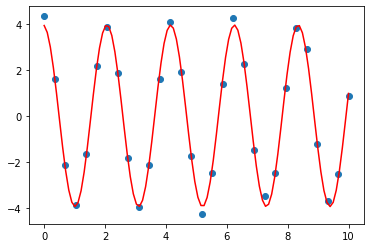

In [81]:
plt.scatter(t_data, y_data)
plt.plot(t_aju, y_aju, 'r')

In [82]:
pcov

array([[ 2.61882717e-03, -4.94131505e-06,  3.47404558e-05],
       [-4.94131505e-06,  1.85637335e-05, -9.60755036e-05],
       [ 3.47404558e-05, -9.60755036e-05,  6.63423791e-04]])

In [83]:
np.diag(pcov)

array([2.61882717e-03, 1.85637335e-05, 6.63423791e-04])

In [84]:
np.sqrt(_)

array([0.05117448, 0.00430857, 0.02575701])

## Ecuaciones algebraicas no lineales

Ecuación de Kepler

$M=E-e\sin{E}$

Despejar $E$

$F(E)=E−e\sin{𝐸}-M$

In [85]:
def F(E,e,M):
    return E-e*np.sin(E)-M

In [86]:
from scipy import optimize

In [89]:
solución=optimize.root(F,10,args=(0.016, 0.1))
solución

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-4.82947016e-13])
       r: array([-0.98408255])
  status: 1
 success: True
       x: array([0.10162317])

In [88]:
solución.x

array([0.10162317])

In [90]:
solución=optimize.bisect(F,-2,2,args=(0.016, 0.1))
solución

0.10162317358299333

## Algebra lineal

Matriz de Toeplitz (Elementos diagonales constantes)

$$ \begin{bmatrix} 1 & -1 & 2 & 3\\ 3 & 1 & -1 & 2 \\ 6 & 3 & 1 & -1 \\ 10 & 6 & 3 & 1 \end{bmatrix} \vec{x} = \begin{bmatrix} 1\\2\\2\\5 \end{bmatrix} $$

In [93]:
columna=np.array([1,3,6,10]) #primera columna
fila=np.array([1,-1,2,3]) #primera fila

c=np.array([1,2,2,5])

In [94]:
from scipy.linalg import solve_toeplitz, toeplitz

In [95]:
x=solve_toeplitz((columna,fila),c)

In [96]:
x

array([ 0.17741935,  0.48387097, -0.0483871 ,  0.46774194])